In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# 1. Cargar los datos
df = pd.read_excel("portabilidad.xlsx")

In [ ]:
# Mostrar primeras filas para exploración

print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,Cedente,Receptor,Modalidad Cedente,Modalidad Receptor,Mes,Líneas
0,América Móvil Perú S.A.C.,Entel Perú S.A.,PREPAGO,PREPAGO,2014-07-01,112
1,América Móvil Perú S.A.C.,Telefónica del Perú S.A.A.,PREPAGO,PREPAGO,2014-07-01,162
2,Entel Perú S.A.,América Móvil Perú S.A.C.,PREPAGO,PREPAGO,2014-07-01,35
3,Entel Perú S.A.,Telefónica del Perú S.A.A.,PREPAGO,PREPAGO,2014-07-01,18
4,Telefónica del Perú S.A.A.,América Móvil Perú S.A.C.,PREPAGO,PREPAGO,2014-07-01,601


In [ ]:
# Visualizar las últimas 5 líneas
df.tail()

,Cedente,Receptor,Modalidad Cedente,Modalidad Receptor,Mes,Líneas
7090,Telefónica del Perú S.A.A.,Viettel Perú S.A.C.,POSTPAGO,PREPAGO,2025-02-01,2128
7091,Telefónica del Perú S.A.A.,Viettel Perú S.A.C.,PREPAGO,POSTPAGO,2025-02-01,4549
7092,Telefónica del Perú S.A.A.,Viettel Perú S.A.C.,PREPAGO,PREPAGO,2025-02-01,11383
7093,Flash Servicios Perú S.R.L.,Viettel Perú S.A.C.,PREPAGO,POSTPAGO,2025-02-01,11
7094,Flash Servicios Perú S.R.L.,Viettel Perú S.A.C.,PREPAGO,PREPAGO,2025-02-01,13


In [ ]:
# 2. Explorar los datos
print("\nInformación general del dataset:")
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Cedente             7095 non-null   object        
 1   Receptor            7095 non-null   object        
 2   Modalidad Cedente   7095 non-null   object        
 3   Modalidad Receptor  7095 non-null   object        
 4   Mes                 7095 non-null   datetime64[ns]
 5   Líneas              7095 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 332.7+ KB


In [ ]:
print("\nDistribución de valores en 'Cedente':")
df['Cedente'].value_counts()



Distribución de valores en 'Cedente':


,count
Cedente,
Telefónica del Perú S.A.A.,1517
Entel Perú S.A.,1459
América Móvil Perú S.A.C.,1452
Viettel Perú S.A.C.,1429
Flash Servicios Perú S.R.L.,722
Guinea Mobile S.A.C.,469
Suma Móvil Perú S.A.C.,46
Dolphin Mobile S.A.C.,1


In [ ]:
print("\nDistribución de valores en'Receptor':")
df['Receptor'].value_counts()


Distribución de valores en'Receptor':


,count
Receptor,
América Móvil Perú S.A.C.,1583
Viettel Perú S.A.C.,1534
Entel Perú S.A.,1479
Telefónica del Perú S.A.A.,1230
Flash Servicios Perú S.R.L.,637
Guinea Mobile S.A.C.,547
Suma Móvil Perú S.A.C.,76
Dolphin Telecom del Perú S.AC.,7
Dolphin Mobile S.A.C.,2


In [ ]:
# Verificar valores faltantes
print("\nValores Faltantes:")
df.isnull().sum()


Valores Faltantes:


,0
Cedente,0
Receptor,0
Modalidad Cedente,0
Modalidad Receptor,0
Mes,0
Líneas,0


In [ ]:
# Estadísticas resumidas
print("\nEstadísticas Resumidas:")
df.describe()


Estadísticas Resumidas:


,Mes,Líneas
count,7095,7095.000000
mean,2021-01-06 13:20:04.059196672,7164.750388
min,2014-07-01 00:00:00,1.000000
25%,2019-04-01 00:00:00,50.000000
50%,2021-06-01 00:00:00,1428.000000
75%,2023-04-01 00:00:00,8927.500000
max,2025-02-01 00:00:00,115446.000000
std,NaN,12280.606479


In [ ]:
# 5.2 Contar filas duplicadas en el DataFrame
duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 0


In [ ]:
# 5.2 Eliminación de filas duplicadas
df = df.drop_duplicates()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Cedente             7095 non-null   object        
 1   Receptor            7095 non-null   object        
 2   Modalidad Cedente   7095 non-null   object        
 3   Modalidad Receptor  7095 non-null   object        
 4   Mes                 7095 non-null   datetime64[ns]
 5   Líneas              7095 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 332.7+ KB


In [ ]:
# 4. Transformación de variables mes a formato datetime
df["FECHA_DESEMBOLSO"] = pd.to_datetime(df["FECHA_DESEMBOLSO"],
format="%Y%m%d")
df["FECHA_CORTE"] = pd.to_datetime(df["FECHA_CORTE"], format="%Y%m%d")
df.head()


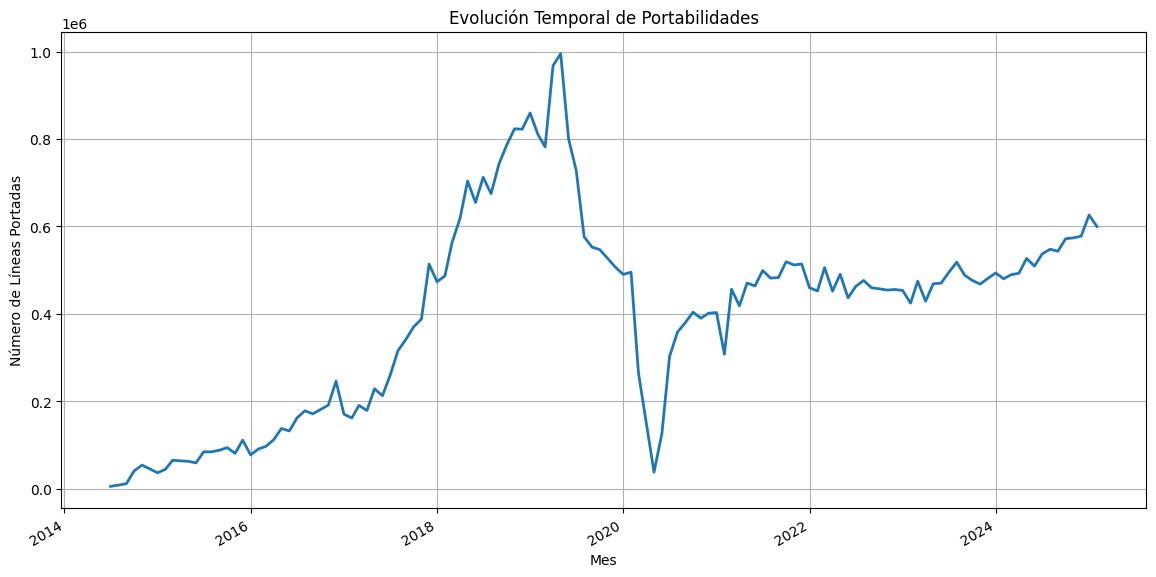

In [ ]:
# 1. Evolución temporal de portabilidades
plt.figure(figsize=(14, 7))
temporal = df.groupby('Mes')['Líneas'].sum()
temporal.plot(title='Evolución Temporal de Portabilidades', lw=2)
plt.ylabel('Número de Líneas Portadas')
plt.grid(True)
plt.show()

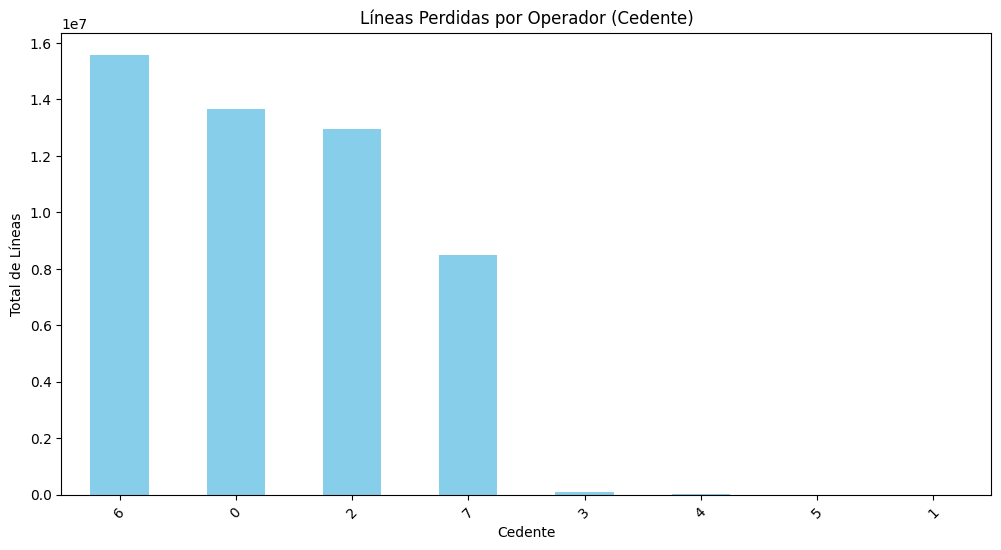

In [ ]:
# 2. Portabilidad por operador (cedente)
plt.figure(figsize=(12, 6))
cedente_counts = df.groupby('Cedente')['Líneas'].sum().sort_values(ascending=False)
cedente_counts.plot(kind='bar', color='skyblue')
plt.title('Líneas Perdidas por Operador (Cedente)')
plt.ylabel('Total de Líneas')
plt.xticks(rotation=45)
plt.show()

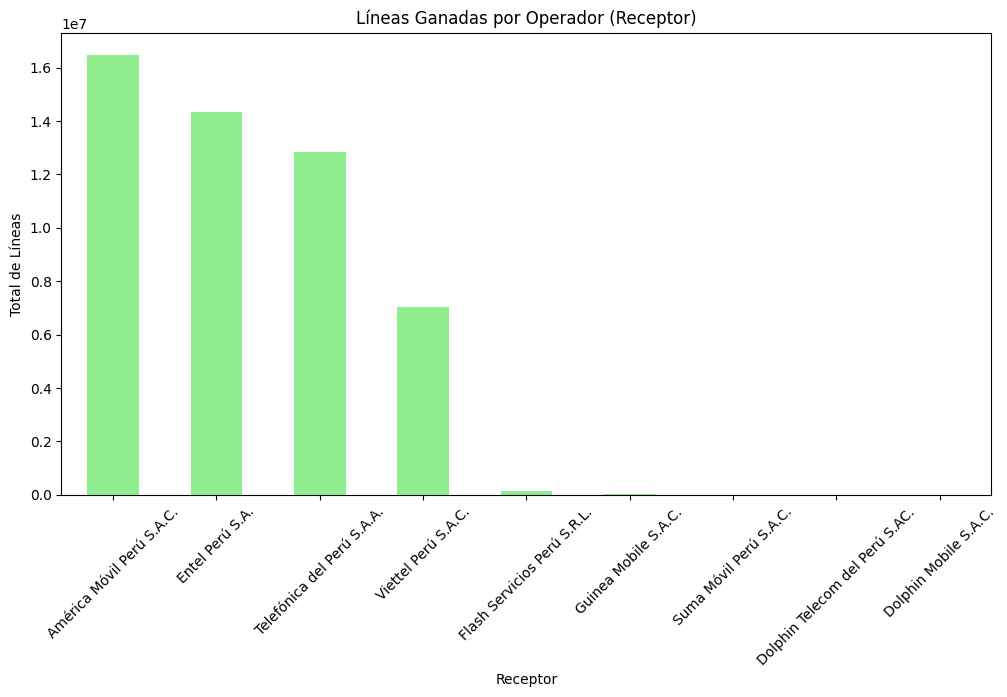

In [ ]:
# 3. Portabilidad por operador (receptor)
plt.figure(figsize=(12, 6))
receptor_counts = df.groupby('Receptor')['Líneas'].sum().sort_values(ascending=False)
receptor_counts.plot(kind='bar', color='lightgreen')
plt.title('Líneas Ganadas por Operador (Receptor)')
plt.ylabel('Total de Líneas')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x500 with 0 Axes>

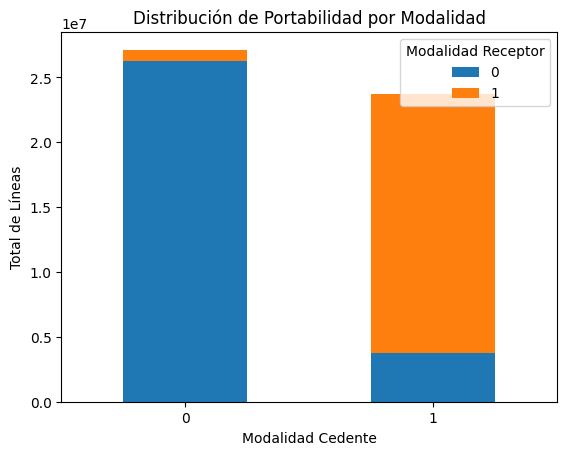

In [ ]:
# 4. Distribución por modalidad
plt.figure(figsize=(10, 5))
modalidad = df.groupby(['Modalidad Cedente', 'Modalidad Receptor'])['Líneas'].sum().unstack()
modalidad.plot(kind='bar', stacked=True)
plt.title('Distribución de Portabilidad por Modalidad')
plt.ylabel('Total de Líneas')
plt.xticks(rotation=0)
plt.show()

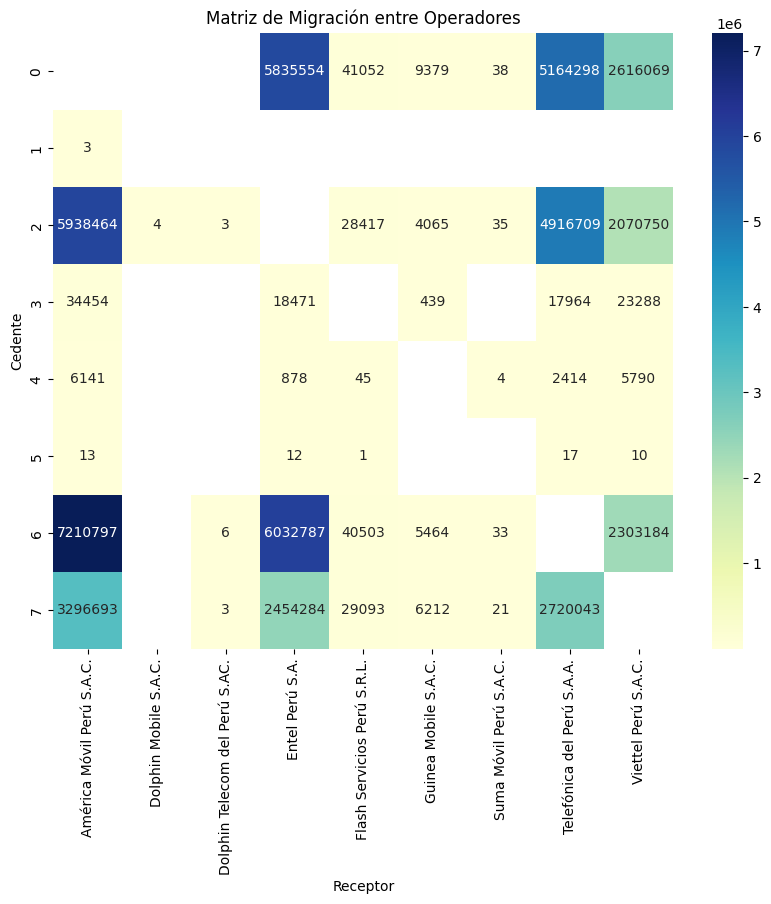

In [ ]:
# 5. Matriz de migración entre operadores
plt.figure(figsize=(10, 8))
migration = df.groupby(['Cedente', 'Receptor'])['Líneas'].sum().unstack()
sns.heatmap(migration, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Matriz de Migración entre Operadores')
plt.xlabel('Receptor')
plt.ylabel('Cedente')
plt.show()

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

DEBUG:cmdstanpy:input tempfile: /tmp/tmp168ny4el/t7_z1yzp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp168ny4el/uit0qmx7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75342', 'data', 'file=/tmp/tmp168ny4el/t7_z1yzp.json', 'init=/tmp/tmp168ny4el/uit0qmx7.json', 'output', 'file=/tmp/tmp168ny4el/prophet_modeliiw_20wr/prophet_model-20250427183724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:37:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:37:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Tipo de datos de 'Mes': datetime64[ns]

Preprocesando datos...

Entrenando modelo Prophet...

Evaluando modelo...

Resultados del Modelo Prophet (Conjunto de Prueba):
MAE: 176459.61
RMSE: 176459.61

Pronósticos para los próximos 12 meses:
Mes: 2026-01, Líneas Predichas: 433,744, Intervalo: [249,433, 624,025]


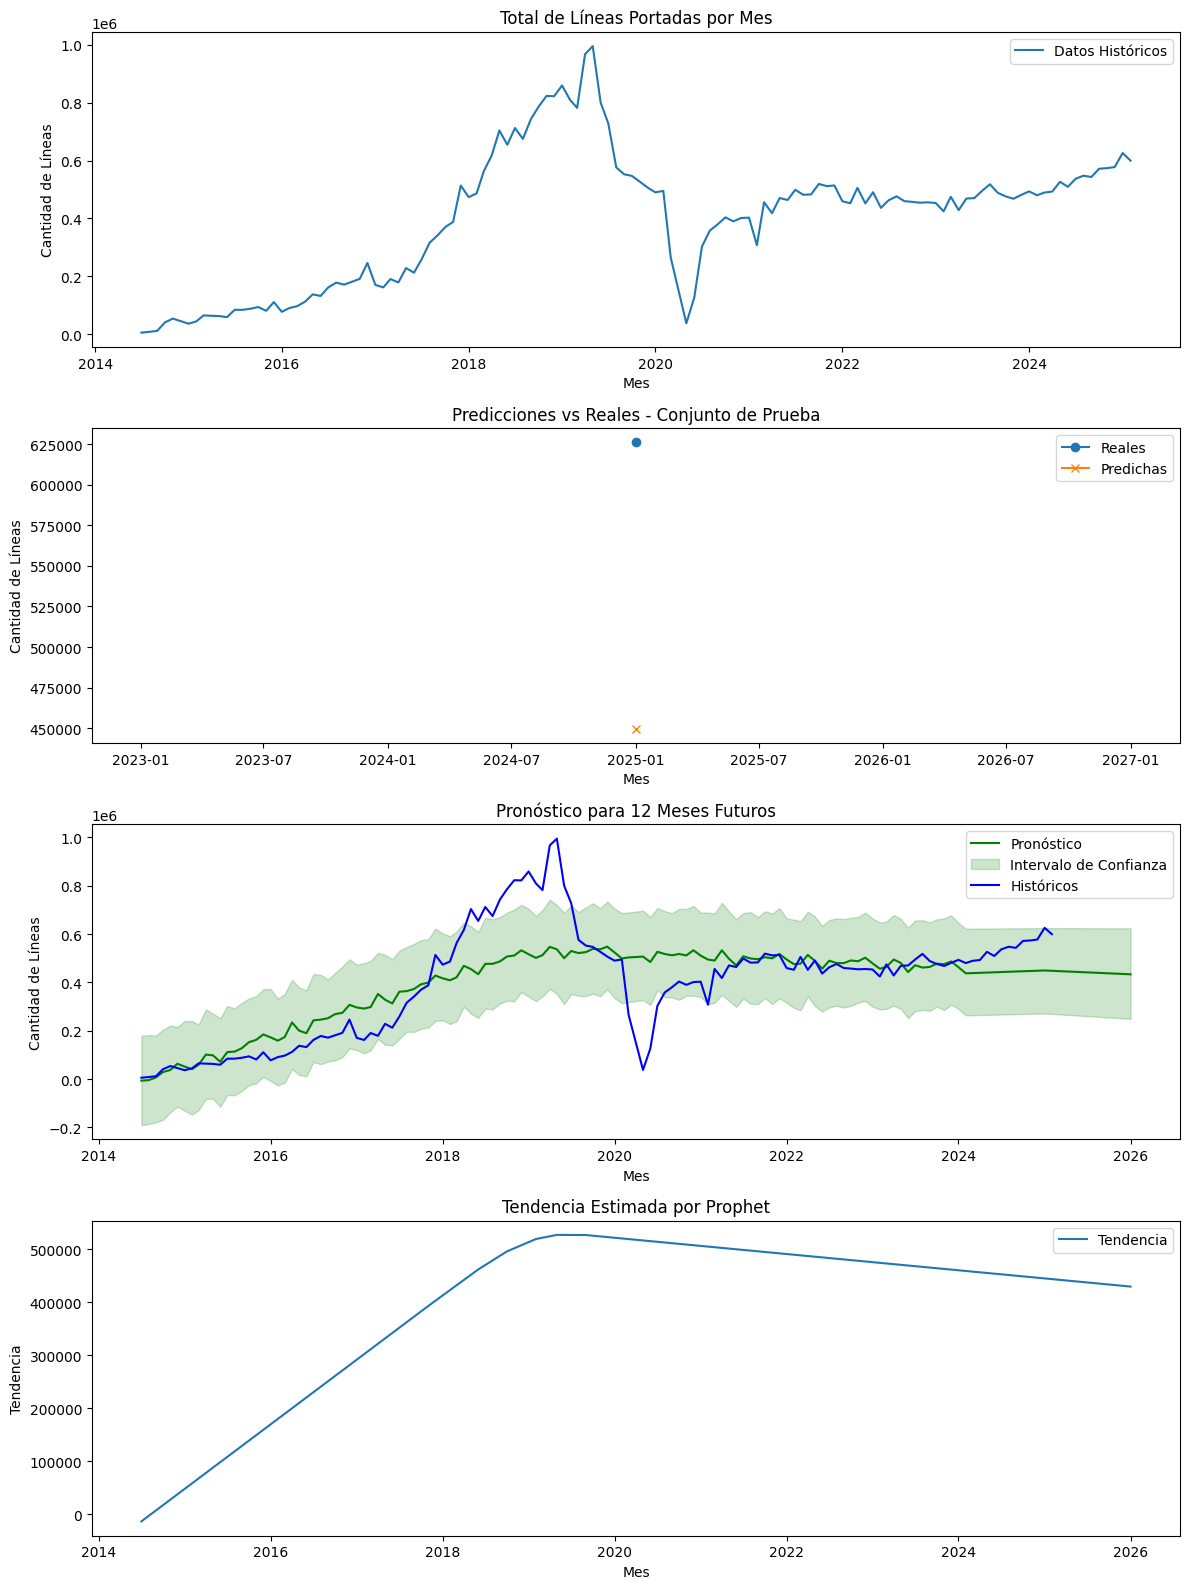


Perspectiva Interesante: El mes con mayor portabilidad fue 2019-05, con 995,190 líneas portadas, sugiriendo un evento significativo o cambio en el mercado.


In [ ]:
# Verificar tipo de datos de 'Mes'
print("\nTipo de datos de 'Mes':", df['Mes'].dtype)

# Si 'Mes' no es datetime, convertir desde formato Excel numérico
if not pd.api.types.is_datetime64_any_dtype(df['Mes']):
    df['Mes'] = pd.to_datetime(df['Mes'], unit='D', origin='1899-12-30')

# Agregar líneas portadas por mes
df_mensual = df.groupby('Mes')['Líneas'].sum().reset_index()
df_mensual.columns = ['ds', 'y']

# --- Paso 2: Preprocesar Datos ---
print("\nPreprocesando datos...")

# Asegurar que no haya valores faltantes
df_mensual = df_mensual.dropna()

# Ordenar por fecha
df_mensual = df_mensual.sort_values('ds')

# --- Paso 3: Modelado con Prophet ---
print("\nEntrenando modelo Prophet...")

# Dividir datos en entrenamiento y prueba (últimos 12 meses para prueba)
fecha_corte = df_mensual['ds'].max() - pd.Timedelta(days=365)
df_entrenamiento = df_mensual[df_mensual['ds'] <= fecha_corte]
df_prueba = df_mensual[df_mensual['ds'] > fecha_corte]

# Inicializar modelo Prophet
modelo = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)

# Entrenar modelo
modelo.fit(df_entrenamiento)

# Crear fechas futuras para predicción (12 meses)
futuro = modelo.make_future_dataframe(periods=2, freq='YS')

# Realizar predicciones
pronostico = modelo.predict(futuro)

# --- Paso 4: Evaluar Modelo ---
print("\nEvaluando modelo...")

# Filtrar predicciones para el conjunto de prueba
pred_prueba = pronostico[pronostico['ds'].isin(df_prueba['ds'])][['ds', 'yhat']]
pred_prueba = pred_prueba.merge(df_prueba, on='ds', how='inner')

# Calcular métricas
mae = mean_absolute_error(pred_prueba['y'], pred_prueba['yhat'])
rmse = np.sqrt(mean_squared_error(pred_prueba['y'], pred_prueba['yhat']))

print("\nResultados del Modelo Prophet (Conjunto de Prueba):")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Mostrar pronósticos para los próximos 12 meses
pronostico_futuro = pronostico[pronostico['ds'] > df_mensual['ds'].max()][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print("\nPronósticos para los próximos 12 meses:")
for idx, row in pronostico_futuro.iterrows():
    print(f"Mes: {row['ds'].strftime('%Y-%m')}, Líneas Predichas: {row['yhat']:,.0f}, "
          f"Intervalo: [{row['yhat_lower']:,.0f}, {row['yhat_upper']:,.0f}]")

# Crear figura con subgráficos (una ventana)
fig, axs = plt.subplots(4, 1, figsize=(12, 16))

# Subgráfico 1: Serie temporal original
axs[0].plot(df_mensual['ds'], df_mensual['y'], label='Datos Históricos')
axs[0].set_title('Total de Líneas Portadas por Mes')
axs[0].set_xlabel('Mes')
axs[0].set_ylabel('Cantidad de Líneas')
axs[0].legend()

# Subgráfico 2: Predicciones vs reales (conjunto de prueba)
axs[1].plot(pred_prueba['ds'], pred_prueba['y'], label='Reales', marker='o')
axs[1].plot(pred_prueba['ds'], pred_prueba['yhat'], label='Predichas', marker='x')
axs[1].set_title('Predicciones vs Reales - Conjunto de Prueba')
axs[1].set_xlabel('Mes')
axs[1].set_ylabel('Cantidad de Líneas')
axs[1].legend()

# Subgráfico 3: Pronóstico futuro
axs[2].plot(pronostico['ds'], pronostico['yhat'], label='Pronóstico', color='green')
axs[2].fill_between(pronostico['ds'], pronostico['yhat_lower'], pronostico['yhat_upper'],
                    color='green', alpha=0.2, label='Intervalo de Confianza')
axs[2].plot(df_mensual['ds'], df_mensual['y'], label='Históricos', color='blue')
axs[2].set_title('Pronóstico para 12 Meses Futuros')
axs[2].set_xlabel('Mes')
axs[2].set_ylabel('Cantidad de Líneas')
axs[2].legend()

# Subgráfico 4: Tendencia
axs[3].plot(pronostico['ds'], pronostico['trend'], label='Tendencia')
axs[3].set_title('Tendencia Estimada por Prophet')
axs[3].set_xlabel('Mes')
axs[3].set_ylabel('Tendencia')
axs[3].legend()

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

# --- Paso 5: Perspectiva Interesante ---
mes_pico = df_mensual.loc[df_mensual['y'].idxmax()]
print(f"\nPerspectiva Interesante: El mes con mayor portabilidad fue {mes_pico['ds'].strftime('%Y-%m')}, con {mes_pico['y']:,.0f} líneas portadas, sugiriendo un evento significativo o cambio en el mercado.")

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_djb5c_v/1xej6gdz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_djb5c_v/9ulmvbib.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87246', 'data', 'file=/tmp/tmp_djb5c_v/1xej6gdz.json', 'init=/tmp/tmp_djb5c_v/9ulmvbib.json', 'output', 'file=/tmp/tmp_djb5c_v/prophet_model9k_5qnzq/prophet_model-20250427183846.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:38:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:38:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Preprocesando datos...

Entrenando modelo Prophet...

Evaluando modelo...

Resultados del Modelo Prophet (Conjunto de Prueba):
MAE: 96507.70
RMSE: 106671.13

Pronósticos para los próximos 24 meses:
Mes: 2025-03, Líneas Predichas: 429,288, Intervalo: [237,366, 610,977]
Mes: 2025-04, Líneas Predichas: 471,752, Intervalo: [287,480, 651,771]
Mes: 2025-05, Líneas Predichas: 436,905, Intervalo: [259,805, 612,104]
Mes: 2025-06, Líneas Predichas: 409,545, Intervalo: [238,772, 591,124]
Mes: 2025-07, Líneas Predichas: 447,101, Intervalo: [264,143, 632,577]
Mes: 2025-08, Líneas Predichas: 437,781, Intervalo: [252,991, 615,314]
Mes: 2025-09, Líneas Predichas: 434,872, Intervalo: [258,260, 613,027]
Mes: 2025-10, Líneas Predichas: 443,135, Intervalo: [250,669, 633,132]
Mes: 2025-11, Líneas Predichas: 438,544, Intervalo: [252,195, 607,688]
Mes: 2025-12, Líneas Predichas: 456,706, Intervalo: [272,316, 632,162]
Mes: 2026-01, Líneas Predichas: 433,744, Intervalo: [237,821, 624,192]
Mes: 2026-02, Líneas

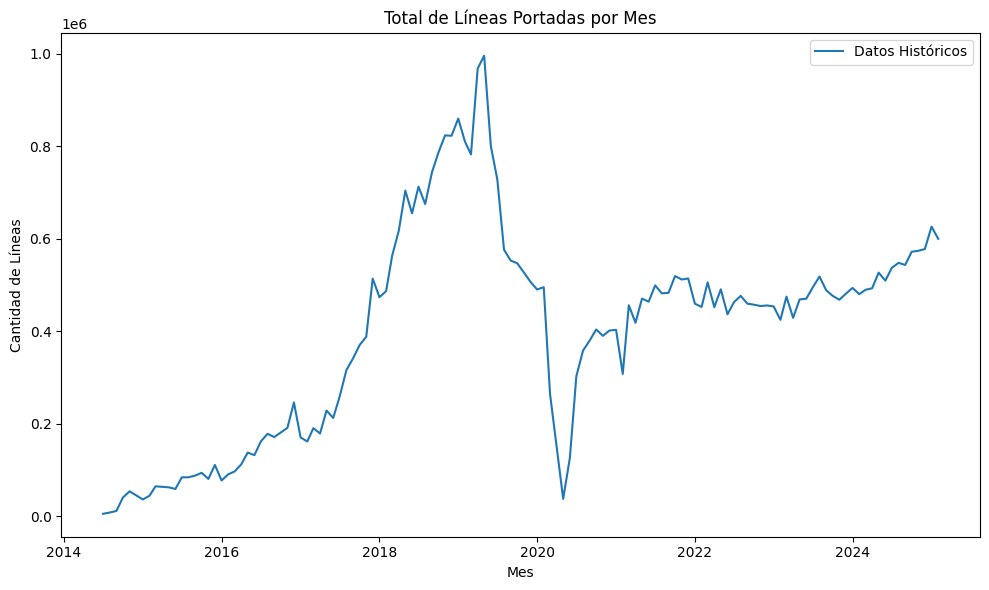

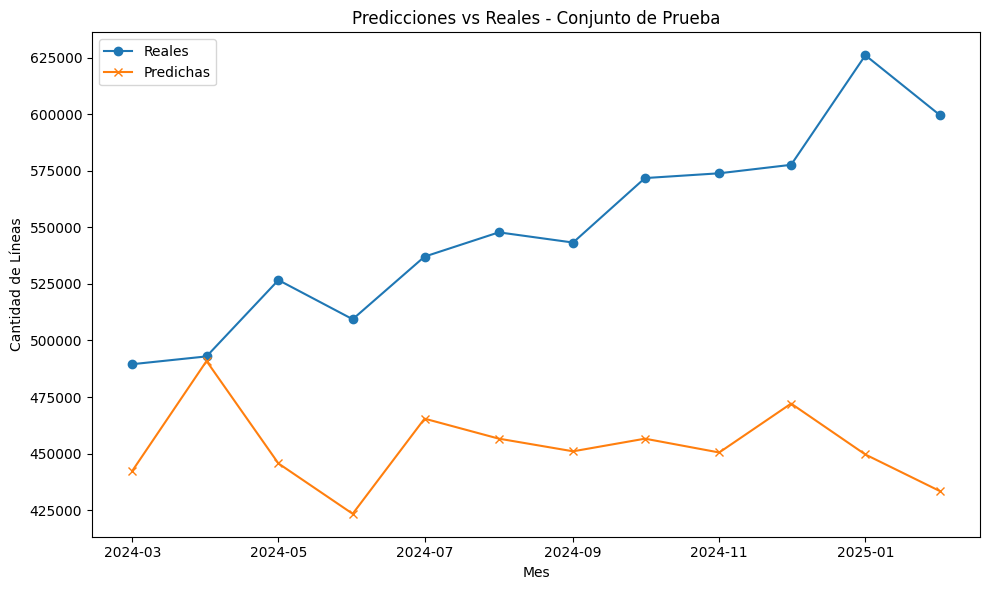

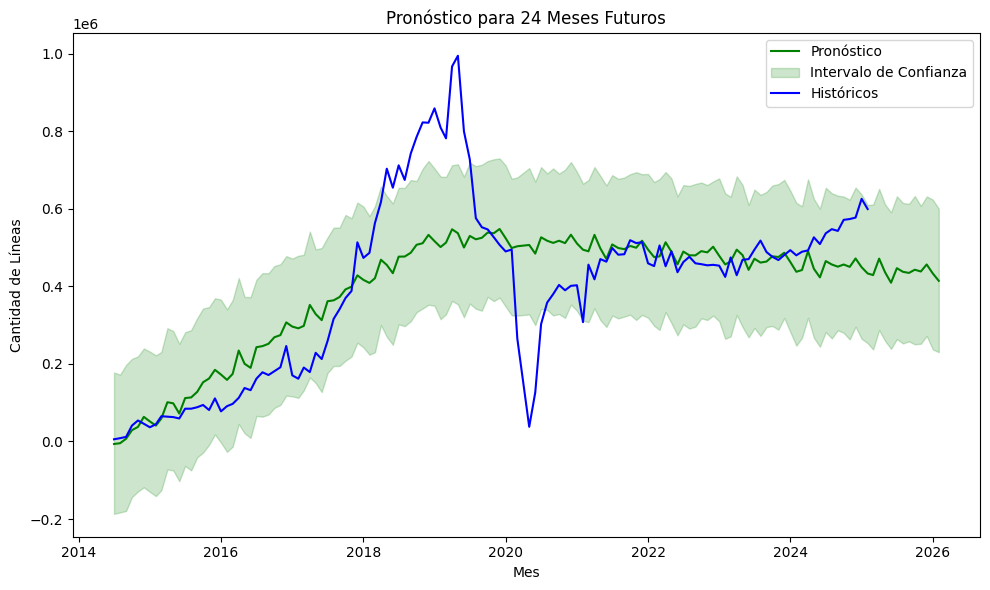

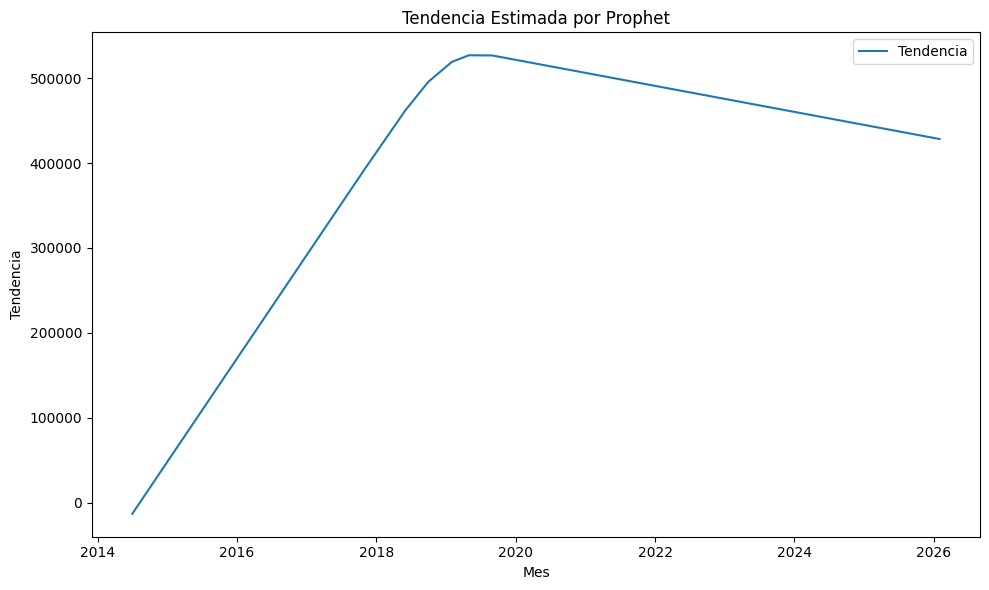


Perspectiva Interesante: El mes con mayor portabilidad fue 2019-05, con 995,190 líneas portadas, sugiriendo un evento significativo o cambio en el mercado.


In [43]:
# Si 'Mes' no es datetime, convertir desde formato Excel numérico
if not pd.api.types.is_datetime64_any_dtype(df['Mes']):
    df['Mes'] = pd.to_datetime(df['Mes'], unit='D', origin='1899-12-30')

# Agregar líneas portadas por mes
df_mensual = df.groupby('Mes')['Líneas'].sum().reset_index()
df_mensual.columns = ['ds', 'y']

# --- Paso 2: Preprocesar Datos ---
print("\nPreprocesando datos...")

# Asegurar que no haya valores faltantes
df_mensual = df_mensual.dropna()

# Ordenar por fecha
df_mensual = df_mensual.sort_values('ds')

# --- Paso 3: Modelado con Prophet ---
print("\nEntrenando modelo Prophet...")

# Dividir datos en entrenamiento y prueba (últimos 12 meses para prueba)
fecha_corte = df_mensual['ds'].max() - pd.Timedelta(days=365)
df_entrenamiento = df_mensual[df_mensual['ds'] <= fecha_corte]
df_prueba = df_mensual[df_mensual['ds'] > fecha_corte]

# Inicializar modelo Prophet
modelo = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)

# Entrenar modelo
modelo.fit(df_entrenamiento)

# Crear fechas futuras para predicción (24 meses)
futuro = modelo.make_future_dataframe(periods=24, freq='MS')

# Realizar predicciones
pronostico = modelo.predict(futuro)

# --- Paso 4: Evaluar Modelo ---
print("\nEvaluando modelo...")

# Filtrar predicciones para el conjunto de prueba
pred_prueba = pronostico[pronostico['ds'].isin(df_prueba['ds'])][['ds', 'yhat']]
pred_prueba = pred_prueba.merge(df_prueba, on='ds', how='inner')

# Calcular métricas
mae = mean_absolute_error(pred_prueba['y'], pred_prueba['yhat'])
rmse = np.sqrt(mean_squared_error(pred_prueba['y'], pred_prueba['yhat']))

print("\nResultados del Modelo Prophet (Conjunto de Prueba):")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Mostrar pronósticos para los próximos 24 meses
pronostico_futuro = pronostico[pronostico['ds'] > df_mensual['ds'].max()][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print("\nPronósticos para los próximos 24 meses:")
for idx, row in pronostico_futuro.iterrows():
    print(f"Mes: {row['ds'].strftime('%Y-%m')}, Líneas Predichas: {row['yhat']:,.0f}, "
          f"Intervalo: [{row['yhat_lower']:,.0f}, {row['yhat_upper']:,.0f}]")

# --- Visualización: Gráficos Independientes ---
# Gráfico 1: Serie temporal original
plt.figure(figsize=(10, 6))
plt.plot(df_mensual['ds'], df_mensual['y'], label='Datos Históricos')
plt.title('Total de Líneas Portadas por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Líneas')
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico 2: Predicciones vs reales (conjunto de prueba)
plt.figure(figsize=(10, 6))
plt.plot(pred_prueba['ds'], pred_prueba['y'], label='Reales', marker='o')
plt.plot(pred_prueba['ds'], pred_prueba['yhat'], label='Predichas', marker='x')
plt.title('Predicciones vs Reales - Conjunto de Prueba')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Líneas')
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico 3: Pronóstico a 24 meses
plt.figure(figsize=(10, 6))
plt.plot(pronostico['ds'], pronostico['yhat'], label='Pronóstico', color='green')
plt.fill_between(pronostico['ds'], pronostico['yhat_lower'], pronostico['yhat_upper'],
                 color='green', alpha=0.2, label='Intervalo de Confianza')
plt.plot(df_mensual['ds'], df_mensual['y'], label='Históricos', color='blue')
plt.title('Pronóstico para 24 Meses Futuros')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Líneas')
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico 4: Tendencia
plt.figure(figsize=(10, 6))
plt.plot(pronostico['ds'], pronostico['trend'], label='Tendencia')
plt.title('Tendencia Estimada por Prophet')
plt.xlabel('Mes')
plt.ylabel('Tendencia')
plt.legend()
plt.tight_layout()
plt.show()

# --- Paso 5: Perspectiva Interesante ---
mes_pico = df_mensual.loc[df_mensual['y'].idxmax()]
print(f"\nPerspectiva Interesante: El mes con mayor portabilidad fue {mes_pico['ds'].strftime('%Y-%m')}, con {mes_pico['y']:,.0f} líneas portadas, sugiriendo un evento significativo o cambio en el mercado.")